In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

# Import Data

In [12]:
with_mask=os.listdir("/Users/madhurabhagat/Downloads/data/with_mask")
print(with_mask[0:5])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']


In [14]:
without_mask=os.listdir("/Users/madhurabhagat/Downloads/data/without_mask")
print(without_mask[0:5])

['without_mask_3593.jpg', 'without_mask_2855.jpg', 'without_mask_1384.jpg', 'without_mask_1390.jpg', 'without_mask_2699.jpg']


In [16]:
print("Total images with mask :",len(with_mask) )
print("Total images without mask :",len(without_mask) )

Total images with mask : 3725
Total images without mask : 3828


In [17]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [20]:
labels=with_mask_labels+without_mask_labels
len(labels)

7553

# Display Image

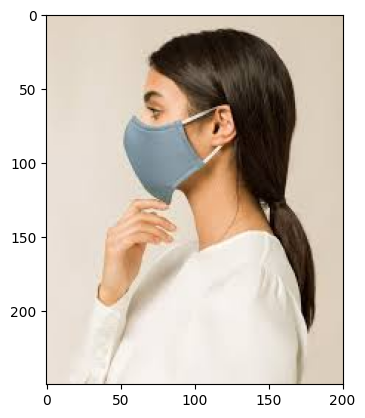

In [21]:
img=mpimg.imread("/Users/madhurabhagat/Downloads/data/with_mask/with_mask_2140.jpg")
imgplot=plt.imshow(img)
plt.show()

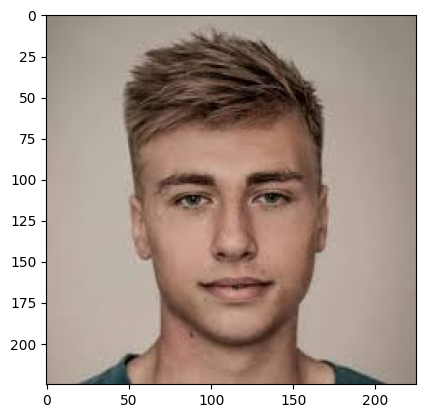

In [23]:
img=mpimg.imread("/Users/madhurabhagat/Downloads/data/without_mask/without_mask_2855.jpg")
imgplot=plt.imshow(img)
plt.show()

# Image Processing

1. Resize Images

In [24]:
with_mask_path="/Users/madhurabhagat/Downloads/data/with_mask/"
data=[]
for img_file in with_mask:
    image=Image.open(with_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert("RGB")
    image=np.array(image)
    data.append(image)

without_mask_path="/Users/madhurabhagat/Downloads/data/without_mask/"
for img_file in without_mask:
    image=Image.open(without_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert("RGB")
    image=np.array(image)
    data.append(image)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
type(data)

list

In [26]:
len(data)

7553

In [27]:
data[0]

array([[[226, 213, 197],
        [226, 213, 197],
        [226, 213, 197],
        ...,
        [214, 201, 182],
        [214, 201, 182],
        [214, 201, 182]],

       [[226, 213, 197],
        [226, 213, 197],
        [226, 213, 197],
        ...,
        [214, 201, 182],
        [214, 201, 182],
        [214, 201, 182]],

       [[226, 213, 197],
        [226, 213, 197],
        [226, 213, 197],
        ...,
        [214, 201, 182],
        [214, 201, 182],
        [214, 201, 182]],

       ...,

       [[235, 225, 216],
        [235, 225, 216],
        [235, 225, 216],
        ...,
        [219, 206, 189],
        [219, 206, 189],
        [219, 206, 189]],

       [[235, 225, 216],
        [235, 225, 216],
        [235, 225, 216],
        ...,
        [219, 206, 189],
        [219, 206, 189],
        [219, 206, 189]],

       [[235, 225, 216],
        [235, 225, 216],
        [235, 225, 216],
        ...,
        [217, 204, 187],
        [217, 204, 187],
        [217, 204, 187]]

In [30]:
data[0].shape

(128, 128, 3)

2. Convert data list and label list in numpy array

In [35]:
x=np.array(data)
y=np.array(labels)
print(y.shape)
print(x.shape)

(7553,)
(7553, 128, 128, 3)


# Train Test Split data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Scaling data 

In [37]:
x_train=x_train/255
x_test=x_test/255

# Building CNN 

In [45]:
num_of_class=2
model=Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class,activation="sigmoid"))

# Compile Neural Network

In [46]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["acc"])

# Training Neural Network

In [47]:
history= model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 54s 302ms/step - acc: 0.7499 - loss: 0.5927 - val_acc: 0.8727 - val_loss: 0.3113
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - acc: 0.8824 - loss: 0.2918 - val_acc: 0.8777 - val_loss: 0.2869
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - acc: 0.9006 - loss: 0.2371 - val_acc: 0.8942 - val_loss: 0.2589
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - acc: 0.9254 - loss: 0.1903 - val_acc: 0.9008 - val_loss: 0.2247
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - acc: 0.9359 - loss: 0.1675 - val_acc: 0.8909 - val_loss: 0.2435


In [48]:
loss,accuracy=model.evaluate(x_test,y_test)
print("Test Accuracy :",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - acc: 0.9292 - loss: 0.1855
Test Accuracy : 0.9252150654792786


# Result

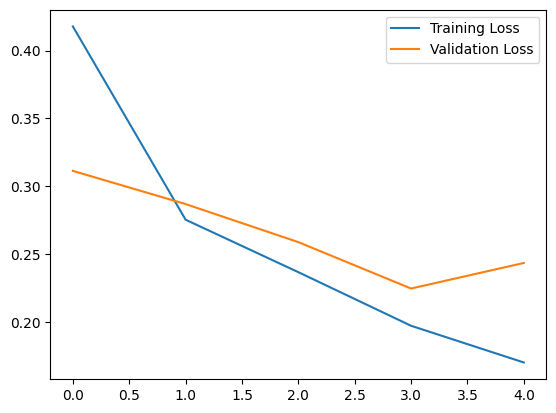

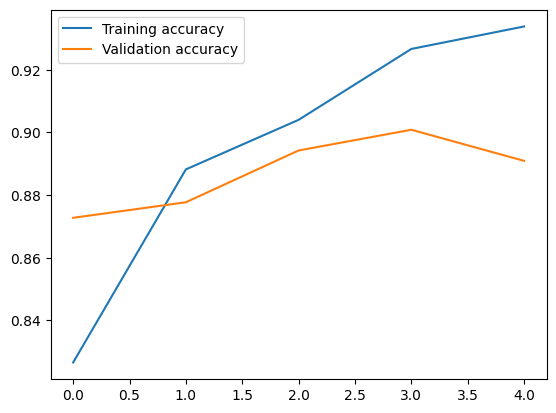

In [49]:
h=history
plt.plot(h.history["loss"],label="Training Loss")
plt.plot(h.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.plot(h.history["acc"],label="Training accuracy")
plt.plot(h.history["val_acc"],label="Validation accuracy")
plt.legend()
plt.show()